#### The document aims to answer question:
## What factors made people more likely to survive during the crash of the titanic ship?
To attain the objective using the given the data set, the target question was broken down into the following questions. Each of the following questions in several ways contributes to answering the target question.
#### Question 1: What was the relationship between age and survival? In other words what age group was more likely to survive the sinking Titanic.
#### Question 2:  What was the relationship between gender and survival? In other words what gender group was more likely to survive the sinking Titanic.
#### Question 3:  When considered together (age and gender), which gender belonging to which age groups are more likely to survive?
#### Question 4: What effect does the passengers's class (also indicating social demographic status) have on his survival?
#### Question 5: Within the class who were more likely to survive based on the ticket fares?

In [53]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [54]:
file_df = pd.read_csv("titanic-data.csv")
"The original dataset contains the following columns with multiple missing values"
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
file_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Age Factor
##### An attemp to answer the question 1

In [56]:
""""The age_group_code() is used to assign age groups to the data frame"""
def age_group_code(num):
    if num>=0 and num<10:
        return "0-9"
    if num>=10 and num<20:
        return "10-19"
    if num>=20 and num<30:
        return "20-29"
    if num>=30 and num<40:
        return "30-39"
    if num>=40 and num<50:
        return "40-49"
    if num>=50 and num<60:
        return "50-59"
    if num>=60 and num<70:
        return "60-69"
    if num>=70 and num<80:
        return "70-79"
    if num>=80:
        return "80+"

In [57]:
"""Adding a Age Group Column and Counts(Use of this will be required when we group the data) to the dataframe
Using of applymap() to determine the age groups
using dropna to drop those columns without age vale"""

age_survival_df = file_df[["Survived","Age"]]
age_survival_df.loc[:,('Age Groups')] = age_survival_df.loc[:,('Age')]
age_survival_df.loc[:,('Counts')] = 1
age_survival_df[["Age Groups"]] = age_survival_df[["Age Groups"]].applymap(age_group_code)
age_survival_df = age_survival_df.dropna(how="any", axis=0)
age_survival_df.head()

,Survived,Age,Age Groups,Counts
0,0,22.0,20-29,1
1,1,38.0,30-39,1
2,1,26.0,20-29,1
3,1,35.0,30-39,1
4,0,35.0,30-39,1


### Data Cleaning procedure 1
The data used for further analysis under the "Age Factor session" has been cleaned above. The age column contained 177 missing values. These have been eliminated using the dropna function of the pandas. The relevant cleaned dataset (age_survival_df) has the following properties.

In [58]:
"""The cleaned dataset now contains just 4 columns"""
age_survival_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
Survived      714 non-null int64
Age           714 non-null float64
Age Groups    714 non-null object
Counts        714 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [59]:
"""Grouping according to the Age group and Survived column
The age column is irrelevant"""
age_survival_grouped = age_survival_df.groupby(["Age Groups","Survived"], as_index=False)["Counts"].sum()
age_survival_grouped.head()

,Age Groups,Survived,Counts
0,0-9,0,24
1,0-9,1,38
2,10-19,0,61
3,10-19,1,41
4,20-29,0,143


In [60]:
"""Box Plots for data"""
def plot_bar(df1,df2):
    ind = np.arange(df1.shape[0]) 
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, df1["Counts"], width, color='y',align="center")
    rects2 = ax.bar(ind+width/2, df2["Counts"], width, color='r')
    ax.set_ylabel('Counts')
    ax.set_xlabel(list(df1.columns.values)[0])
    ax.set_title('Counts of survived or dead based on '+ list(df1.columns.values)[0])
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(df1.ix[:,0])
    ax.legend((rects1[0], rects2[0]), ('Survived', 'Dead'), loc="upper left")
    plt.show()


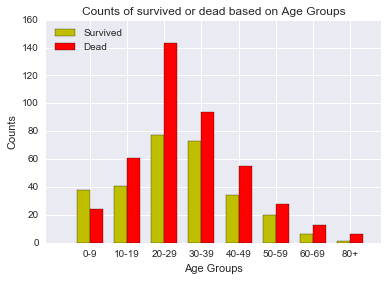

In [61]:
"""forming new data frames with each containing values of survived and dead counts, this is done for ease of plotting"""
survived_df = age_survival_grouped[age_survival_grouped["Survived"] == 1]
dead_df = age_survival_grouped[age_survival_grouped["Survived"] == 0]

"""Creation of bar plots"""
plot_bar(survived_df, dead_df)

#plot_bars(survived_df, dead_df)

#### Observation 1: 
From the above graph, it becomes particularly clear that only passengers under the age of 10 had a greater chance to survive. For all the other age groups the number of people survived were far less compared to those dead.

# Gender Factor
##### An attempt to answer question 2

In [62]:
gender_survival_df = file_df[["Sex","Survived"]]
gender_survival_df.loc[:,('Counts')] = 1
gender_survival_df.head()

,Sex,Survived,Counts
0,male,0,1
1,female,1,1
2,female,1,1
3,female,1,1
4,male,0,1


In [63]:
"""Grouping according to the Sex and Survived column"""
gender_survival_grouped = gender_survival_df.groupby(["Sex","Survived"], as_index=False)["Counts"].sum()
gender_survival_grouped.head()

,Sex,Survived,Counts
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


### Data Cleaning procedure 2
The data used for further analysis under the "Gender Factor" section has been cleaned above. The relevant contained no missing values. An additional column of counts was added which is later used to determine the relevant counts of passengers under certain conditions. The relevant cleaned dataset (age_survival_df) has the following properties.

In [64]:
gender_survival_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 3 columns):
Sex         4 non-null object
Survived    4 non-null int64
Counts      4 non-null int64
dtypes: int64(2), object(1)
memory usage: 128.0+ bytes


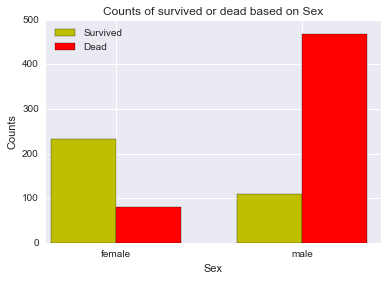

In [65]:
"""forming new data frames with each containing values of survived and dead counts, this is done for ease of plotting"""
survived_gender_df = gender_survival_grouped[gender_survival_grouped["Survived"] == 1]
dead_gender_df = gender_survival_grouped[gender_survival_grouped["Survived"] == 0]

"""Creation of bar plots"""
plot_bar(survived_gender_df, dead_gender_df)


### Percentage of female and male survived

In [66]:
print survived_gender_df.iloc[0][2]/float(survived_gender_df.iloc[0][2]+dead_gender_df.iloc[0][2])*100
print survived_gender_df.iloc[1][2]/float(survived_gender_df.iloc[1][2]+dead_gender_df.iloc[1][2])*100

74.2038216561
18.8908145581


#### Observation 2
Percentage of female survided = 74.2%
Percentage of male survided = 18.9%
The above graph and statistics make it amply clear that female gender was more likely to survive during the crash

# Age vs Gender
##### An attempt to answere question 3

In [67]:
"function to convert a the Sex string to a number with male-->0 and female-->1"
def sex_number(string):
    if string == "male":
        return 1
    else:
        return 0

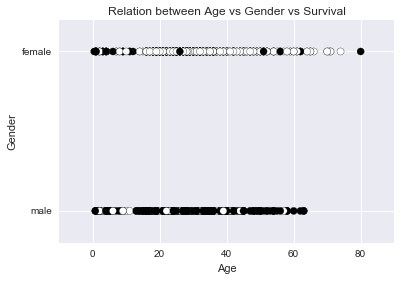

In [68]:
"""Grouping according to the Sex, Age and Survival"""
age_gender_survival_df = file_df[["Survived","Age","Sex"]]
age_gender_survival_df = age_gender_survival_df.dropna(axis=0, how="any")
age_gender_survival_df[["Sex"]] = age_gender_survival_df[["Sex"]].applymap(sex_number)
age_gender_survival_df.head()

"""The relevant plot used to answer the question"""
figs, ax = plt.subplots()
rects = ax.scatter(age_gender_survival_df["Age"], age_gender_survival_df["Sex"], c=age_gender_survival_df["Survived"], s=50)
ax.set_yticks(age_gender_survival_df["Sex"])
ax.set_yticklabels(survived_gender_df["Sex"])
ax.set_ylabel('Gender')
ax.set_xlabel('Age')
ax.set_title('Relation between Age vs Gender vs Survival')
plt.show()

### Data Cleaning procedure 3
For answering the third question the requirement was felt to add an extra variable. This variable represented the numerical categorical value, this was done with an eye for ease of plotting. The age variable also contained 177 missing values which were eliminated using dropna() function of panda data frame

In [69]:
"""The cleaned dataset had the following charachteristics"""
age_gender_survival_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
Survived    714 non-null int64
Age         714 non-null float64
Sex         714 non-null int64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


#### Observation 3:
The graph above makes it quite apparent that,
1. women in the age group of 15 and above were very likely to survive. The mortality seems to higher for women in children under the age of 15.
2. Men showed an opposite trend to women with a very high mortality rate overall, further in men those who survived were disporportionately children under the age of 15.

# Class and Intra-Class Factor
##### An attempt to answer questions 4 and 5

In [70]:
class_survival_df = file_df[["Survived","Pclass"]]
class_survival_df.loc[:,("Counts")] = 1
class_survival_df.head()

,Survived,Pclass,Counts
0,0,3,1
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,1


In [71]:
"""Grouping according to the Passenger Class and Survived column"""
class_survival_grouped = class_survival_df.groupby(["Pclass","Survived"], as_index=False)["Counts"].sum()
class_survival_grouped

,Pclass,Survived,Counts
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


### Data Cleaning procedure 4
A number of changes were made in the dataset.
1. The column for counts was added and then then the dataset was grouped to represent the counts for relevant passenger class and survival code.
2. The entire data was then broken down into 3 data frames based on the 3 passenger classes, each containing the variable of Counts and Fare Kind
2. An additional column for Fare Kind was added which represents the quartile that the fare lies in for that particular class

In [72]:
"""1st change"""
class_survival_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 3 columns):
Pclass      6 non-null int64
Survived    6 non-null int64
Counts      6 non-null int64
dtypes: int64(3)
memory usage: 192.0 bytes


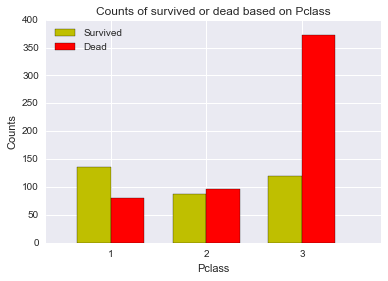

In [73]:
"""forming new data frames with each containing values of survived and dead counts, this is done for ease of plotting"""
survived_class_df = class_survival_grouped[class_survival_grouped["Survived"] == 1]
dead_class_df = class_survival_grouped[class_survival_grouped["Survived"] == 0]

"""Creation of bar plots"""
plot_bar(survived_class_df, dead_class_df)

#### Observation 4
From the above graph it becomes quite apparent that the highest survival rate was amongst passangers of first class, whereas the mortatlity rate was very high for passengers in third class. The passengers in the second class showed an equal proprtion of those who survived and those who died in th crash.

In [74]:
class_df = file_df[["Pclass","Fare","Survived"]]
""""Creating three seperate dataframes or each of the three classes"""
first_class = class_df[class_df["Pclass"]==1]
second_class = class_df[class_df["Pclass"]==2]
third_class = class_df[class_df["Pclass"]==3]

"""Using the qcut() function of pandas, I am finding the quantile range in which the fare prices in each of the classes falls
and then replacing with high, medium, low, lowest"""
first_class.loc[:,("Fare Kind")] =first_class.loc[:,("Fare")]
first_class.loc[:,("Fare Kind")] = pd.qcut(first_class["Fare Kind"],[0,0.25,0.5,0.75,1], \
                                           labels=["Lowest","Low","Medium","high"])
second_class.loc[:,("Fare Kind")] =second_class.loc[:,("Fare")]
second_class.loc[:,("Fare Kind")] = pd.qcut(second_class["Fare Kind"],[0,0.25,0.5,0.75,1], \
                                            labels=["Lowest","Low","Medium","high"])
third_class.loc[:,("Fare Kind")] =third_class.loc[:,("Fare")]
third_class.loc[:,("Fare Kind")] = pd.qcut(third_class["Fare Kind"],[0,0.25,0.5,0.75,1], \
                                           labels=["Lowest","Low","Medium","high"])

first_class.loc[:,("Counts")] = 1
second_class.loc[:,("Counts")] = 1
third_class.loc[:,("Counts")] = 1
""""Look the seond_class data frame to understand what I have done above"""
third_class.head()

,Pclass,Fare,Survived,Fare Kind,Counts
0,3,7.2500,0,Lowest,1
2,3,7.9250,1,Low,1
4,3,8.0500,0,Low,1
5,3,8.4583,0,Medium,1
7,3,21.0750,0,high,1


In [75]:
"""2nd change"""
third_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 890
Data columns (total 5 columns):
Pclass       491 non-null int64
Fare         491 non-null float64
Survived     491 non-null int64
Fare Kind    491 non-null category
Counts       491 non-null int64
dtypes: category(1), float64(1), int64(3)
memory usage: 19.7 KB


In [76]:
first_class_grouped = first_class.groupby(["Fare Kind", "Survived"]).sum()
second_class_grouped = second_class.groupby(["Fare Kind", "Survived"]).sum()
third_class_grouped = third_class.groupby(["Fare Kind", "Survived"]).sum()

first_class_grouped = first_class_grouped["Counts"].reset_index()
second_class_grouped = second_class_grouped["Counts"].reset_index()
third_class_grouped = third_class_grouped["Counts"].reset_index()

""
survived_first_class_df = first_class_grouped[first_class_grouped["Survived"] == 1]
dead_first_class_df = first_class_grouped[first_class_grouped["Survived"] == 0]
survived_second_class_df = second_class_grouped[second_class_grouped["Survived"] == 1]
dead_second_class_df = second_class_grouped[first_class_grouped["Survived"] == 0]
survived_third_class_df = third_class_grouped[third_class_grouped["Survived"] == 1]
dead_third_class_df = third_class_grouped[first_class_grouped["Survived"] == 0]

survived_third_class_df.head()

,Fare Kind,Survived,Counts
1,Lowest,1,29
3,Low,1,29
5,Medium,1,27
7,high,1,34


In [77]:
"""3rd chnage"""
survived_third_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 7
Data columns (total 3 columns):
Fare Kind    4 non-null category
Survived     4 non-null int64
Counts       4 non-null int64
dtypes: category(1), int64(2)
memory usage: 132.0 bytes


In [78]:
def plot_bar2(df1,df2,class_num,loc="upper left"):
    ind = np.arange(df1.shape[0]) 
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, df1["Counts"], width, color='y',align="center")
    rects2 = ax.bar(ind+width/2, df2["Counts"], width, color='r')
    ax.set_ylabel('Counts')
    ax.set_xlabel(list(df1.columns.values)[0])
    ax.set_title('Counts of survived or dead based on Fares in '+ class_num + ' class')
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(df1.ix[:,0])
    ax.legend((rects1[0], rects2[0]), ('Survived', 'Dead'), loc=loc)  

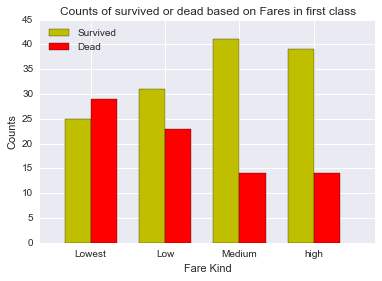

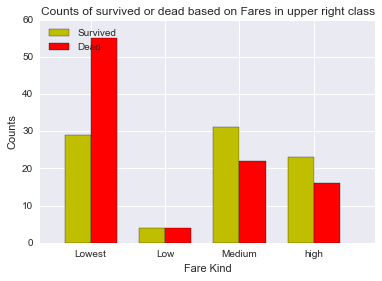

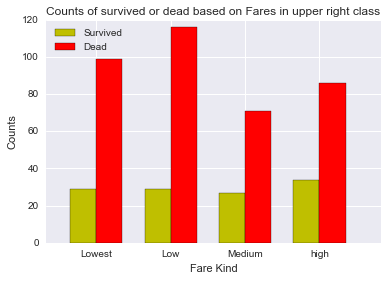

In [79]:
plot_bar2(survived_first_class_df, dead_first_class_df, "first")
plot_bar2(survived_second_class_df, dead_second_class_df, "upper right")
plot_bar2(survived_third_class_df, dead_third_class_df, "upper right")

### Observation 5
1. The first of the above graphs clearly shows that the survival rate is overall pretty high for the passengers in the first class. Only those first class passengers whoes tickte fares lie in the lowest quartile (for only the first class ticket fares) show more deaths compared to those who survived.
2. In the second of the above graphs, for the second class passengers whoes tickets fares lie the top 50 percentile had mortality rate lower than the death rate. The proportion is nearly euqal for passengers in second quartile.
3. For the third class passengers, the final graph shows a very unsettling trend, with higher mortality rate across all quartiles and significantly high mortality for the bottom two quartiles.

### Independent Samples one tailed t-test
We shall perform an independent samples t-test to determine if there is a significant difference between the fares for men and women.

In [80]:
female_fares = file_df[file_df["Sex"]=="female"]["Fare"]
male_fares = file_df[file_df["Sex"]=="male"]["Fare"]
result = stats.ttest_ind(female_fares,male_fares)
pvalue = result[1]
print pvalue

4.23086787004e-08


### Observation 6
The above performed independent 2-tailed t-test proves that there is indeed a significant difference in the ticket fares of men and women (at 95% significance level). The women on an average possess tickets of much higher value than men do. This reinforces our earlier observations that women on an averge have far lower mortality rate (Observation 2) and further passengers with higher ticket prices have lower mortality rate (Observation 4).

# Conclusions

Throughout the course of this document I have listed down several observations which narrate the conclusions drawn from the exercises performed above those observations. However, one must be utterly careful in consedering these observations as final causation word.
For instance in my final obseration I mentioned that women purchased tickets with higher prices and passengers with higher priced tickets (since higher price corrsponds to higher class) had lower mortality. This by no means indicates that if you buy higher prices tickets you will be safe. A probable reason for such an observation could be that the working crew on the Titanic were disproportionately men (Since a lot of men had 0 fares). Further, one must also remember that during the submergence of Titanic as a gesture of courtesy, valor and chivalry, women were allowed to board the life boards before men were, this couls also be a reason for high survival proportion amon women.